In [1]:
import pandas as pd
import numpy as np
import matplotlib

In [2]:
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


In [3]:
attack_types = {
        'normal': 'normal',

        'back': 'DoS',
        'land': 'DoS',
        'neptune': 'DoS',
        'pod': 'DoS',
        'smurf': 'DoS',
        'teardrop': 'DoS',
        'mailbomb': 'DoS',
        'apache2': 'DoS',
        'processtable': 'DoS',
        'udpstorm': 'DoS',

        'ipsweep': 'Probe',
        'nmap': 'Probe',
        'portsweep': 'Probe',
        'satan': 'Probe',
        'mscan': 'Probe',
        'saint': 'Probe',

        'ftp_write': 'R2L',
        'guess_passwd': 'R2L',
        'imap': 'R2L',
        'multihop': 'R2L',
        'phf': 'R2L',
        'spy': 'R2L',
        'warezclient': 'R2L',
        'warezmaster': 'R2L',
        'sendmail': 'R2L',
        'named': 'R2L',
        'snmpgetattack': 'R2L',
        'snmpguess': 'R2L',
        'xlock': 'R2L',
        'xsnoop': 'R2L',
        'worm': 'R2L',

        'buffer_overflow': 'U2R',
        'loadmodule': 'U2R',
        'perl': 'U2R',
        'rootkit': 'U2R',
        'httptunnel': 'U2R',
        'ps': 'U2R',
        'sqlattack': 'U2R',
        'xterm': 'U2R'
}


In [4]:
is_attack = {
        "DoS":"attack",
        "R2L":"attack",
        "U2R":"attack",
        "Probe":"attack",
        "normal":"normal"
}

In [6]:
class read_data:
    col_names = ["duration","protocol_type","service","flag","src_bytes",
        "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
        "logged_in","num_compromised","root_shell","su_attempted","num_root",
        "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
        "is_host_login","is_guest_login","count","srv_count","serror_rate",
        "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
        "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
        "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
        "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
        "dst_host_rerror_rate","dst_host_srv_rerror_rate","label", "difficulty_level"]

    KDDTrain = pd.read_csv("KDDTrain+.txt",names = col_names,)
    KDDTest = pd.read_csv("KDDTest+.txt",names = col_names,)


    KDDAll = pd.concat([KDDTrain, KDDTest])

    kdd_diff_level_all = KDDAll["difficulty_level"].copy()
    kdd_diff_level_train = KDDTrain["difficulty_level"].copy()
    kdd_diff_level_test = KDDTest["difficulty_level"].copy()

    KDDAll = KDDAll.drop("difficulty_level", axis = 1)

    KDDTrain.to_csv("KDDAll+.csv")

    KDDTrain_len = KDDTrain.shape[0]
    KDDTest_len = KDDTest.shape[0]

    KDDAll["type"] = KDDAll.label.map(lambda x: attack_types[x])
    KDDAll["isa"] = KDDAll.type.map(lambda x: is_attack[x])

    KDDTrain["type"] = KDDTrain.label.map(lambda x: attack_types[x])
    KDDTrain["isa"] = KDDTrain.type.map(lambda x: is_attack[x])

    KDDTest["type"] = KDDTest.label.map(lambda x: attack_types[x])
    KDDTest["isa"] = KDDTest.type.map(lambda x: is_attack[x])

    kdd_attack_type_group = KDDAll.groupby("type")
    kdd_is_attack_group = KDDAll.groupby("isa")

    kdd_attack_type_group.type.count()
    kdd_is_attack_group["isa"].count()

    KDDAll_is = KDDAll.copy()
    KDDAll_type = KDDAll.copy()

    KDDAll_is_y = KDDAll["isa"].copy()
    KDDAll_is.drop(["label", "isa"], axis=1, inplace=True)
    KDDAll_type_y = KDDAll["type"].copy()
    KDDAll_type.drop(["label", "type"], axis=1, inplace=True)

    KDDTrain_is_y = KDDTrain["isa"].copy()
    KDDTrain_type_y = KDDTrain["type"].copy()

    KDDTest_is_y = KDDTest["isa"].copy()
    KDDTest_type_y = KDDTest["type"].copy()

    class_mapping = {'attack': 0, 'normal': 1}
    Y_Train = KDDTrain_is_y.map(class_mapping)
    Y_Test = KDDTest_is_y.map(class_mapping)


In [7]:
class preprocess_data:

    col_names_onehot = ["protocol_type","service","flag", "type"]
    col_names_onehot_s = ["protocol_type","service","flag","type"]
    KDDAll_num = read_data.KDDAll_is.drop(col_names_onehot, axis=1)  #pd
    KDDAll_onehot_s = read_data.KDDAll_is[ col_names_onehot_s]  #pd

    num_pipeline = Pipeline([('scaling', StandardScaler())])
    cat_string_pipeline = Pipeline([('imputer', SimpleImputer(strategy = "constant", fill_value = "missing")), ('ordi', OrdinalEncoder()), ('onehots', OneHotEncoder(categories='auto'))])

    num_attribs = list(KDDAll_num)
    cat_s_attribs = list(KDDAll_onehot_s)

    full_pipeline = ColumnTransformer([("num", num_pipeline, num_attribs), ("cats", cat_string_pipeline, cat_s_attribs)])

    KDDAll_t = full_pipeline.fit_transform(read_data.KDDAll_is)

    X_Train = KDDAll_t[:read_data.KDDTrain_len]
    X_Test = KDDAll_t[read_data.KDDTrain_len:read_data.KDDTrain_len + read_data.KDDTest_len]


In [9]:
!pip install scikeras

In [59]:
import tensorflow as tf
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras import optimizers
from tensorflow.python.keras import models
from tensorflow.python.keras import layers
from scikeras import wrappers
from tensorflow.python.keras import initializers
from tensorflow.python.keras import regularizers
from tensorflow.python.keras import losses
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier
from sklearn.metrics import classification_report
import time

In [60]:
features_dim = preprocess_data.X_Train.shape[1]

In [61]:
def build_model(learning_rate,mt,regrt, lay1, lay2, lay3, initiali):
    model = models.Sequential([
    layers.Dense(units=lay1, input_shape=(features_dim,), activation="relu", kernel_initializer=kernel_initializer, bias_initializer='zeros'),
    layers.Dropout(0.2),
    layers.Dense(units=lay2, activation="relu"),
    layers.Dropout(0.2),
    layers.Dense(units=lay3, activation="relu"),
    layers.Dropout(0.2),
    layers.Dense(1, activation="sigmoid")])
    optRMS = optimizers.RMSprop(lr=learning_rate)
    model.compile(loss='binary_crossentropy', optimizer='RMSprop')
    return model


In [146]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal
from tensorflow.keras import models, layers, optimizers

# Define the build_model function
def build_model(features_dim, lr=0.001, rho=0.9, units_1=256, units_2=64, units_3=32, kernel_initializer='glorot_uniform'):
    model = models.Sequential()

    # Add input layer
    model.add(layers.Dense(units=units_1, input_shape=(features_dim,), activation="relu", kernel_initializer=kernel_initializer, bias_initializer='zeros'))
    model.add(layers.Dropout(0.2))

    # Add hidden layers
    model.add(layers.Dense(units=units_2, activation="relu"))
    model.add(layers.Dropout(0.2))

    model.add(layers.Dense(units=units_3, activation="relu"))
    model.add(layers.Dropout(0.2))

    # Add output layer
    model.add(layers.Dense(1, activation="sigmoid"))

    opt_rms = optimizers.RMSprop(learning_rate=lr, rho=rho)
    model.compile(loss='binary_crossentropy', optimizer=opt_rms)

    return model

# Set the parameters
batch_size = 2000
epochs = 75
ver = 2
features_dim = preprocess_data.X_Train.shape[1]

# Create the KerasClassifier with custom parameters
keras_reg = KerasClassifier(build_fn=build_model, features_dim=features_dim, lr=0.001, rho=0.9, units_1=256, units_2=64, units_3=32, kernel_initializer='glorot_uniform')

# Define the parameter distributions
param_distribs = {
    "lr": reciprocal(0.0001, 0.0005),
    "rho": reciprocal(0.5, 0.9),
    "units_1": [256, 128],
    "units_2": [64, 32],
    "units_3": [32, 16],
}

X_Train = preprocess_data.X_Train
Y_Train = read_data.Y_Train

X_Test = preprocess_data.X_Test
Y_Test = read_data.Y_Test

# Create and run the RandomizedSearchCV
random_search = RandomizedSearchCV(keras_reg, param_distributions=param_distribs, n_iter=10, cv=3, verbose=ver, random_state=42, error_score='raise')

random_search.fit(X_Train, Y_Train, epochs=epochs, batch_size=batch_size)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/75
42/42 [==============================] - 4s 47ms/step - loss: 0.5253
Epoch 2/75
42/42 [==============================] - 3s 82ms/step - loss: 0.2801
Epoch 3/75
42/42 [==============================] - 2s 44ms/step - loss: 0.1526
Epoch 4/75
42/42 [==============================] - 2s 37ms/step - loss: 0.0952
Epoch 5/75
42/42 [==============================] - 2s 37ms/step - loss: 0.0633
Epoch 6/75
42/42 [==============================] - 2s 39ms/step - loss: 0.0433
Epoch 7/75
42/42 [==============================] - 1s 33ms/step - loss: 0.0290
Epoch 8/75
42/42 [==============================] - 1s 22ms/step - loss: 0.0204
Epoch 9/75
42/42 [==============================] - 1s 18ms/step - loss: 0.0161
Epoch 10/75
42/42 [==============================] - 1s 18ms/step - loss: 0.0124
Epoch 11/75
42/42 [==============================] - 1s 26ms/step - loss: 0.0092
Epoch 12/75
42/42 [==============================] - 1s 30ms/step - loss: 0.0076
Epoch 13/75
42/42 [==================

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/75
42/42 [==============================] - 1s 19ms/step - loss: 0.5219
Epoch 2/75
42/42 [==============================] - 1s 18ms/step - loss: 0.2866
Epoch 3/75
42/42 [==============================] - 1s 18ms/step - loss: 0.1588
Epoch 4/75
42/42 [==============================] - 1s 18ms/step - loss: 0.1022
Epoch 5/75
42/42 [==============================] - 1s 18ms/step - loss: 0.0704
Epoch 6/75
42/42 [==============================] - 1s 18ms/step - loss: 0.0494
Epoch 7/75
42/42 [==============================] - 1s 18ms/step - loss: 0.0323
Epoch 8/75
42/42 [==============================] - 1s 18ms/step - loss: 0.0208
Epoch 9/75
42/42 [==============================] - 1s 18ms/step - loss: 0.0142
Epoch 10/75
42/42 [==============================] - 1s 18ms/step - loss: 0.0104
Epoch 11/75
42/42 [==============================] - 1s 18ms/step - loss: 0.0080
Epoch 12/75
42/42 [==============================] - 1s 21ms/step - loss: 0.0075
Epoch 13/75
42/42 [==================

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/75
42/42 [==============================] - 2s 23ms/step - loss: 0.5395
Epoch 2/75
42/42 [==============================] - 1s 19ms/step - loss: 0.2836
Epoch 3/75
42/42 [==============================] - 1s 18ms/step - loss: 0.1520
Epoch 4/75
42/42 [==============================] - 1s 18ms/step - loss: 0.0964
Epoch 5/75
42/42 [==============================] - 1s 18ms/step - loss: 0.0661
Epoch 6/75
42/42 [==============================] - 1s 18ms/step - loss: 0.0467
Epoch 7/75
42/42 [==============================] - 1s 18ms/step - loss: 0.0302
Epoch 8/75
42/42 [==============================] - 1s 18ms/step - loss: 0.0221
Epoch 9/75
42/42 [==============================] - 1s 18ms/step - loss: 0.0150
Epoch 10/75
42/42 [==============================] - 1s 18ms/step - loss: 0.0128
Epoch 11/75
42/42 [==============================] - 1s 19ms/step - loss: 0.0100
Epoch 12/75
42/42 [==============================] - 1s 18ms/step - loss: 0.0089
Epoch 13/75
42/42 [==================

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/75
42/42 [==============================] - 2s 21ms/step - loss: 0.4453
Epoch 2/75
42/42 [==============================] - 1s 33ms/step - loss: 0.1394
Epoch 3/75
42/42 [==============================] - 1s 34ms/step - loss: 0.0670
Epoch 4/75
42/42 [==============================] - 1s 33ms/step - loss: 0.0402
Epoch 5/75
42/42 [==============================] - 1s 28ms/step - loss: 0.0225
Epoch 6/75
42/42 [==============================] - 1s 20ms/step - loss: 0.0136
Epoch 7/75
42/42 [==============================] - 1s 21ms/step - loss: 0.0114
Epoch 8/75
42/42 [==============================] - 1s 21ms/step - loss: 0.0081
Epoch 9/75
42/42 [==============================] - 1s 21ms/step - loss: 0.0060
Epoch 10/75
42/42 [==============================] - 1s 21ms/step - loss: 0.0058
Epoch 11/75
42/42 [==============================] - 1s 21ms/step - loss: 0.0057
Epoch 12/75
42/42 [==============================] - 1s 21ms/step - loss: 0.0062
Epoch 13/75
42/42 [==================

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/75
42/42 [==============================] - 2s 21ms/step - loss: 0.4397
Epoch 2/75
42/42 [==============================] - 1s 21ms/step - loss: 0.1511
Epoch 3/75
42/42 [==============================] - 1s 21ms/step - loss: 0.0744
Epoch 4/75
42/42 [==============================] - 1s 21ms/step - loss: 0.0439
Epoch 5/75
42/42 [==============================] - 1s 21ms/step - loss: 0.0231
Epoch 6/75
42/42 [==============================] - 1s 20ms/step - loss: 0.0127
Epoch 7/75
42/42 [==============================] - 1s 21ms/step - loss: 0.0085
Epoch 8/75
42/42 [==============================] - 1s 21ms/step - loss: 0.0073
Epoch 9/75
42/42 [==============================] - 1s 21ms/step - loss: 0.0070
Epoch 10/75
42/42 [==============================] - 1s 25ms/step - loss: 0.0067
Epoch 11/75
42/42 [==============================] - 1s 35ms/step - loss: 0.0056
Epoch 12/75
42/42 [==============================] - 1s 35ms/step - loss: 0.0052
Epoch 13/75
42/42 [==================

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/75
42/42 [==============================] - 2s 33ms/step - loss: 0.4480
Epoch 2/75
42/42 [==============================] - 1s 34ms/step - loss: 0.1937
Epoch 3/75
42/42 [==============================] - 1s 30ms/step - loss: 0.0906
Epoch 4/75
42/42 [==============================] - 1s 21ms/step - loss: 0.0537
Epoch 5/75
42/42 [==============================] - 1s 22ms/step - loss: 0.0273
Epoch 6/75
42/42 [==============================] - 1s 21ms/step - loss: 0.0157
Epoch 7/75
42/42 [==============================] - 1s 21ms/step - loss: 0.0098
Epoch 8/75
42/42 [==============================] - 1s 21ms/step - loss: 0.0071
Epoch 9/75
42/42 [==============================] - 1s 20ms/step - loss: 0.0058
Epoch 10/75
42/42 [==============================] - 1s 21ms/step - loss: 0.0049
Epoch 11/75
42/42 [==============================] - 1s 21ms/step - loss: 0.0044
Epoch 12/75
42/42 [==============================] - 1s 21ms/step - loss: 0.0038
Epoch 13/75
42/42 [==================

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/75
42/42 [==============================] - 1s 14ms/step - loss: 0.4047
Epoch 2/75
42/42 [==============================] - 1s 14ms/step - loss: 0.1322
Epoch 3/75
42/42 [==============================] - 1s 15ms/step - loss: 0.0728
Epoch 4/75
42/42 [==============================] - 1s 14ms/step - loss: 0.0375
Epoch 5/75
42/42 [==============================] - 1s 14ms/step - loss: 0.0197
Epoch 6/75
42/42 [==============================] - 1s 14ms/step - loss: 0.0134
Epoch 7/75
42/42 [==============================] - 1s 14ms/step - loss: 0.0081
Epoch 8/75
42/42 [==============================] - 1s 15ms/step - loss: 0.0059
Epoch 9/75
42/42 [==============================] - 1s 14ms/step - loss: 0.0051
Epoch 10/75
42/42 [==============================] - 1s 14ms/step - loss: 0.0041
Epoch 11/75
42/42 [==============================] - 1s 20ms/step - loss: 0.0067
Epoch 12/75
42/42 [==============================] - 1s 22ms/step - loss: 0.0033
Epoch 13/75
42/42 [==================

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/75
42/42 [==============================] - 1s 15ms/step - loss: 0.4383
Epoch 2/75
42/42 [==============================] - 1s 13ms/step - loss: 0.1420
Epoch 3/75
42/42 [==============================] - 1s 14ms/step - loss: 0.0649
Epoch 4/75
42/42 [==============================] - 1s 14ms/step - loss: 0.0333
Epoch 5/75
42/42 [==============================] - 1s 13ms/step - loss: 0.0187
Epoch 6/75
42/42 [==============================] - 1s 14ms/step - loss: 0.0106
Epoch 7/75
42/42 [==============================] - 1s 13ms/step - loss: 0.0102
Epoch 8/75
42/42 [==============================] - 1s 16ms/step - loss: 0.0067
Epoch 9/75
42/42 [==============================] - 1s 22ms/step - loss: 0.0054
Epoch 10/75
42/42 [==============================] - 1s 22ms/step - loss: 0.0052
Epoch 11/75
42/42 [==============================] - 1s 22ms/step - loss: 0.0049
Epoch 12/75
42/42 [==============================] - 1s 21ms/step - loss: 0.0042
Epoch 13/75
42/42 [==================

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/75
42/42 [==============================] - 1s 14ms/step - loss: 0.3912
Epoch 2/75
42/42 [==============================] - 1s 14ms/step - loss: 0.1253
Epoch 3/75
42/42 [==============================] - 1s 14ms/step - loss: 0.0603
Epoch 4/75
42/42 [==============================] - 1s 13ms/step - loss: 0.0324
Epoch 5/75
42/42 [==============================] - 1s 14ms/step - loss: 0.0182
Epoch 6/75
42/42 [==============================] - 1s 14ms/step - loss: 0.0130
Epoch 7/75
42/42 [==============================] - 1s 14ms/step - loss: 0.0094
Epoch 8/75
42/42 [==============================] - 1s 14ms/step - loss: 0.0060
Epoch 9/75
42/42 [==============================] - 1s 14ms/step - loss: 0.0082
Epoch 10/75
42/42 [==============================] - 1s 14ms/step - loss: 0.0059
Epoch 11/75
42/42 [==============================] - 1s 14ms/step - loss: 0.0065
Epoch 12/75
42/42 [==============================] - 1s 14ms/step - loss: 0.0037
Epoch 13/75
42/42 [==================

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/75
42/42 [==============================] - 1s 12ms/step - loss: 0.6651
Epoch 2/75
42/42 [==============================] - 0s 12ms/step - loss: 0.5557
Epoch 3/75
42/42 [==============================] - 1s 12ms/step - loss: 0.4500
Epoch 4/75
42/42 [==============================] - 1s 12ms/step - loss: 0.3540
Epoch 5/75
42/42 [==============================] - 1s 12ms/step - loss: 0.2731
Epoch 6/75
42/42 [==============================] - 0s 12ms/step - loss: 0.2099
Epoch 7/75
42/42 [==============================] - 1s 12ms/step - loss: 0.1644
Epoch 8/75
42/42 [==============================] - 1s 12ms/step - loss: 0.1325
Epoch 9/75
42/42 [==============================] - 1s 12ms/step - loss: 0.1112
Epoch 10/75
42/42 [==============================] - 0s 12ms/step - loss: 0.0964
Epoch 11/75
42/42 [==============================] - 1s 12ms/step - loss: 0.0831
Epoch 12/75
42/42 [==============================] - 0s 12ms/step - loss: 0.0728
Epoch 13/75
42/42 [==================

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/75
42/42 [==============================] - 1s 12ms/step - loss: 0.5983
Epoch 2/75
42/42 [==============================] - 1s 12ms/step - loss: 0.4850
Epoch 3/75
42/42 [==============================] - 1s 12ms/step - loss: 0.3897
Epoch 4/75
42/42 [==============================] - 1s 12ms/step - loss: 0.3078
Epoch 5/75
42/42 [==============================] - 1s 12ms/step - loss: 0.2441
Epoch 6/75
42/42 [==============================] - 1s 12ms/step - loss: 0.1935
Epoch 7/75
42/42 [==============================] - 1s 12ms/step - loss: 0.1570
Epoch 8/75
42/42 [==============================] - 1s 12ms/step - loss: 0.1312
Epoch 9/75
42/42 [==============================] - 0s 12ms/step - loss: 0.1126
Epoch 10/75
42/42 [==============================] - 1s 12ms/step - loss: 0.0978
Epoch 11/75
42/42 [==============================] - 0s 12ms/step - loss: 0.0866
Epoch 12/75
42/42 [==============================] - 1s 12ms/step - loss: 0.0773
Epoch 13/75
42/42 [==================

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/75
42/42 [==============================] - 1s 12ms/step - loss: 0.6626
Epoch 2/75
42/42 [==============================] - 1s 12ms/step - loss: 0.5500
Epoch 3/75
42/42 [==============================] - 1s 12ms/step - loss: 0.4726
Epoch 4/75
42/42 [==============================] - 1s 12ms/step - loss: 0.4112
Epoch 5/75
42/42 [==============================] - 1s 12ms/step - loss: 0.3569
Epoch 6/75
42/42 [==============================] - 1s 12ms/step - loss: 0.3067
Epoch 7/75
42/42 [==============================] - 1s 13ms/step - loss: 0.2608
Epoch 8/75
42/42 [==============================] - 1s 18ms/step - loss: 0.2218
Epoch 9/75
42/42 [==============================] - 1s 18ms/step - loss: 0.1856
Epoch 10/75
42/42 [==============================] - 1s 19ms/step - loss: 0.1556
Epoch 11/75
42/42 [==============================] - 1s 19ms/step - loss: 0.1333
Epoch 12/75
42/42 [==============================] - 1s 19ms/step - loss: 0.1161
Epoch 13/75
42/42 [==================

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/75
42/42 [==============================] - 1s 12ms/step - loss: 0.6556
Epoch 2/75
42/42 [==============================] - 0s 12ms/step - loss: 0.5247
Epoch 3/75
42/42 [==============================] - 1s 12ms/step - loss: 0.4045
Epoch 4/75
42/42 [==============================] - 1s 19ms/step - loss: 0.3031
Epoch 5/75
42/42 [==============================] - 1s 19ms/step - loss: 0.2251
Epoch 6/75
42/42 [==============================] - 1s 18ms/step - loss: 0.1713
Epoch 7/75
42/42 [==============================] - 1s 19ms/step - loss: 0.1358
Epoch 8/75
42/42 [==============================] - 1s 18ms/step - loss: 0.1114
Epoch 9/75
42/42 [==============================] - 1s 18ms/step - loss: 0.0937
Epoch 10/75
42/42 [==============================] - 1s 14ms/step - loss: 0.0792
Epoch 11/75
42/42 [==============================] - 0s 12ms/step - loss: 0.0675
Epoch 12/75
42/42 [==============================] - 1s 12ms/step - loss: 0.0557
Epoch 13/75
42/42 [==================

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/75
42/42 [==============================] - 2s 18ms/step - loss: 0.5764
Epoch 2/75
42/42 [==============================] - 1s 18ms/step - loss: 0.4158
Epoch 3/75
42/42 [==============================] - 1s 19ms/step - loss: 0.2910
Epoch 4/75
42/42 [==============================] - 1s 18ms/step - loss: 0.2078
Epoch 5/75
42/42 [==============================] - 1s 19ms/step - loss: 0.1547
Epoch 6/75
42/42 [==============================] - 1s 12ms/step - loss: 0.1236
Epoch 7/75
42/42 [==============================] - 1s 13ms/step - loss: 0.1022
Epoch 8/75
42/42 [==============================] - 1s 12ms/step - loss: 0.0877
Epoch 9/75
42/42 [==============================] - 1s 13ms/step - loss: 0.0720
Epoch 10/75
42/42 [==============================] - 0s 12ms/step - loss: 0.0594
Epoch 11/75
42/42 [==============================] - 1s 13ms/step - loss: 0.0486
Epoch 12/75
42/42 [==============================] - 0s 12ms/step - loss: 0.0388
Epoch 13/75
42/42 [==================

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/75
42/42 [==============================] - 1s 12ms/step - loss: 0.6170
Epoch 2/75
42/42 [==============================] - 1s 12ms/step - loss: 0.4778
Epoch 3/75
42/42 [==============================] - 1s 12ms/step - loss: 0.3686
Epoch 4/75
42/42 [==============================] - 1s 12ms/step - loss: 0.2825
Epoch 5/75
42/42 [==============================] - 0s 12ms/step - loss: 0.2151
Epoch 6/75
42/42 [==============================] - 1s 12ms/step - loss: 0.1656
Epoch 7/75
42/42 [==============================] - 1s 12ms/step - loss: 0.1310
Epoch 8/75
42/42 [==============================] - 1s 12ms/step - loss: 0.1068
Epoch 9/75
42/42 [==============================] - 0s 12ms/step - loss: 0.0884
Epoch 10/75
42/42 [==============================] - 1s 12ms/step - loss: 0.0746
Epoch 11/75
42/42 [==============================] - 0s 12ms/step - loss: 0.0618
Epoch 12/75
42/42 [==============================] - 1s 12ms/step - loss: 0.0510
Epoch 13/75
42/42 [==================

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/75
42/42 [==============================] - 2s 21ms/step - loss: 0.6264
Epoch 2/75
42/42 [==============================] - 1s 21ms/step - loss: 0.4428
Epoch 3/75
42/42 [==============================] - 1s 21ms/step - loss: 0.2977
Epoch 4/75
42/42 [==============================] - 1s 21ms/step - loss: 0.1935
Epoch 5/75
42/42 [==============================] - 1s 21ms/step - loss: 0.1331
Epoch 6/75
42/42 [==============================] - 1s 21ms/step - loss: 0.0981
Epoch 7/75
42/42 [==============================] - 1s 21ms/step - loss: 0.0764
Epoch 8/75
42/42 [==============================] - 1s 23ms/step - loss: 0.0593
Epoch 9/75
42/42 [==============================] - 1s 34ms/step - loss: 0.0468
Epoch 10/75
42/42 [==============================] - 1s 33ms/step - loss: 0.0370
Epoch 11/75
42/42 [==============================] - 1s 34ms/step - loss: 0.0272
Epoch 12/75
42/42 [==============================] - 1s 27ms/step - loss: 0.0238
Epoch 13/75
42/42 [==================

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/75
42/42 [==============================] - 2s 33ms/step - loss: 0.6225
Epoch 2/75
42/42 [==============================] - 1s 35ms/step - loss: 0.4429
Epoch 3/75
42/42 [==============================] - 1s 34ms/step - loss: 0.2935
Epoch 4/75
42/42 [==============================] - 1s 27ms/step - loss: 0.1951
Epoch 5/75
42/42 [==============================] - 1s 21ms/step - loss: 0.1368
Epoch 6/75
42/42 [==============================] - 1s 21ms/step - loss: 0.1053
Epoch 7/75
42/42 [==============================] - 1s 21ms/step - loss: 0.0870
Epoch 8/75
42/42 [==============================] - 1s 21ms/step - loss: 0.0712
Epoch 9/75
42/42 [==============================] - 1s 22ms/step - loss: 0.0583
Epoch 10/75
42/42 [==============================] - 1s 22ms/step - loss: 0.0462
Epoch 11/75
42/42 [==============================] - 1s 21ms/step - loss: 0.0350
Epoch 12/75
42/42 [==============================] - 1s 21ms/step - loss: 0.0274
Epoch 13/75
42/42 [==================

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/75
42/42 [==============================] - 3s 36ms/step - loss: 0.6085
Epoch 2/75
42/42 [==============================] - 2s 36ms/step - loss: 0.4207
Epoch 3/75
42/42 [==============================] - 1s 28ms/step - loss: 0.2703
Epoch 4/75
42/42 [==============================] - 1s 23ms/step - loss: 0.1758
Epoch 5/75
42/42 [==============================] - 1s 23ms/step - loss: 0.1241
Epoch 6/75
42/42 [==============================] - 1s 23ms/step - loss: 0.0959
Epoch 7/75
42/42 [==============================] - 1s 23ms/step - loss: 0.0751
Epoch 8/75
42/42 [==============================] - 1s 22ms/step - loss: 0.0588
Epoch 9/75
42/42 [==============================] - 1s 21ms/step - loss: 0.0447
Epoch 10/75
42/42 [==============================] - 1s 22ms/step - loss: 0.0366
Epoch 11/75
42/42 [==============================] - 1s 22ms/step - loss: 0.0276
Epoch 12/75
42/42 [==============================] - 1s 22ms/step - loss: 0.0231
Epoch 13/75
42/42 [==================

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/75
42/42 [==============================] - 2s 23ms/step - loss: 0.6039
Epoch 2/75
42/42 [==============================] - 1s 25ms/step - loss: 0.4049
Epoch 3/75
42/42 [==============================] - 1s 24ms/step - loss: 0.2777
Epoch 4/75
42/42 [==============================] - 1s 23ms/step - loss: 0.1919
Epoch 5/75
42/42 [==============================] - 1s 17ms/step - loss: 0.1424
Epoch 6/75
42/42 [==============================] - 1s 16ms/step - loss: 0.1142
Epoch 7/75
42/42 [==============================] - 1s 16ms/step - loss: 0.0932
Epoch 8/75
42/42 [==============================] - 1s 15ms/step - loss: 0.0803
Epoch 9/75
42/42 [==============================] - 1s 15ms/step - loss: 0.0677
Epoch 10/75
42/42 [==============================] - 1s 15ms/step - loss: 0.0542
Epoch 11/75
42/42 [==============================] - 1s 14ms/step - loss: 0.0451
Epoch 12/75
42/42 [==============================] - 1s 14ms/step - loss: 0.0364
Epoch 13/75
42/42 [==================

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/75
42/42 [==============================] - 1s 15ms/step - loss: 0.6407
Epoch 2/75
42/42 [==============================] - 1s 16ms/step - loss: 0.4688
Epoch 3/75
42/42 [==============================] - 1s 23ms/step - loss: 0.3269
Epoch 4/75
42/42 [==============================] - 1s 22ms/step - loss: 0.2268
Epoch 5/75
42/42 [==============================] - 1s 22ms/step - loss: 0.1623
Epoch 6/75
42/42 [==============================] - 1s 22ms/step - loss: 0.1201
Epoch 7/75
42/42 [==============================] - 1s 22ms/step - loss: 0.0928
Epoch 8/75
42/42 [==============================] - 1s 18ms/step - loss: 0.0722
Epoch 9/75
42/42 [==============================] - 1s 18ms/step - loss: 0.0577
Epoch 10/75
42/42 [==============================] - 1s 16ms/step - loss: 0.0452
Epoch 11/75
42/42 [==============================] - 1s 16ms/step - loss: 0.0378
Epoch 12/75
42/42 [==============================] - 1s 16ms/step - loss: 0.0309
Epoch 13/75
42/42 [==================

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/75
42/42 [==============================] - 1s 15ms/step - loss: 0.6967
Epoch 2/75
42/42 [==============================] - 1s 14ms/step - loss: 0.4418
Epoch 3/75
42/42 [==============================] - 1s 15ms/step - loss: 0.2892
Epoch 4/75
42/42 [==============================] - 1s 15ms/step - loss: 0.2011
Epoch 5/75
42/42 [==============================] - 1s 16ms/step - loss: 0.1515
Epoch 6/75
42/42 [==============================] - 1s 15ms/step - loss: 0.1197
Epoch 7/75
42/42 [==============================] - 1s 21ms/step - loss: 0.0980
Epoch 8/75
42/42 [==============================] - 1s 22ms/step - loss: 0.0821
Epoch 9/75
42/42 [==============================] - 1s 22ms/step - loss: 0.0671
Epoch 10/75
42/42 [==============================] - 1s 24ms/step - loss: 0.0535
Epoch 11/75
42/42 [==============================] - 1s 23ms/step - loss: 0.0438
Epoch 12/75
42/42 [==============================] - 1s 23ms/step - loss: 0.0380
Epoch 13/75
42/42 [==================

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/75
42/42 [==============================] - 1s 14ms/step - loss: 0.6272
Epoch 2/75
42/42 [==============================] - 1s 14ms/step - loss: 0.4746
Epoch 3/75
42/42 [==============================] - 1s 14ms/step - loss: 0.3394
Epoch 4/75
42/42 [==============================] - 1s 14ms/step - loss: 0.2362
Epoch 5/75
42/42 [==============================] - 1s 15ms/step - loss: 0.1677
Epoch 6/75
42/42 [==============================] - 1s 14ms/step - loss: 0.1271
Epoch 7/75
42/42 [==============================] - 1s 14ms/step - loss: 0.1026
Epoch 8/75
42/42 [==============================] - 1s 14ms/step - loss: 0.0855
Epoch 9/75
42/42 [==============================] - 1s 14ms/step - loss: 0.0722
Epoch 10/75
42/42 [==============================] - 1s 14ms/step - loss: 0.0627
Epoch 11/75
42/42 [==============================] - 1s 17ms/step - loss: 0.0508
Epoch 12/75
42/42 [==============================] - 1s 21ms/step - loss: 0.0386
Epoch 13/75
42/42 [==================

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/75
42/42 [==============================] - 1s 14ms/step - loss: 0.6641
Epoch 2/75
42/42 [==============================] - 1s 14ms/step - loss: 0.5009
Epoch 3/75
42/42 [==============================] - 1s 14ms/step - loss: 0.3557
Epoch 4/75
42/42 [==============================] - 1s 14ms/step - loss: 0.2464
Epoch 5/75
42/42 [==============================] - 1s 15ms/step - loss: 0.1737
Epoch 6/75
42/42 [==============================] - 1s 14ms/step - loss: 0.1297
Epoch 7/75
42/42 [==============================] - 1s 14ms/step - loss: 0.1034
Epoch 8/75
42/42 [==============================] - 1s 14ms/step - loss: 0.0837
Epoch 9/75
42/42 [==============================] - 1s 14ms/step - loss: 0.0713
Epoch 10/75
42/42 [==============================] - 1s 14ms/step - loss: 0.0589
Epoch 11/75
42/42 [==============================] - 1s 14ms/step - loss: 0.0497
Epoch 12/75
42/42 [==============================] - 1s 14ms/step - loss: 0.0409
Epoch 13/75
42/42 [==================

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/75
42/42 [==============================] - 2s 20ms/step - loss: 0.5731
Epoch 2/75
42/42 [==============================] - 1s 22ms/step - loss: 0.3842
Epoch 3/75
42/42 [==============================] - 1s 21ms/step - loss: 0.2551
Epoch 4/75
42/42 [==============================] - 1s 21ms/step - loss: 0.1703
Epoch 5/75
42/42 [==============================] - 1s 21ms/step - loss: 0.1230
Epoch 6/75
42/42 [==============================] - 1s 20ms/step - loss: 0.0979
Epoch 7/75
42/42 [==============================] - 1s 16ms/step - loss: 0.0793
Epoch 8/75
42/42 [==============================] - 1s 14ms/step - loss: 0.0674
Epoch 9/75
42/42 [==============================] - 1s 14ms/step - loss: 0.0557
Epoch 10/75
42/42 [==============================] - 1s 14ms/step - loss: 0.0429
Epoch 11/75
42/42 [==============================] - 1s 14ms/step - loss: 0.0349
Epoch 12/75
42/42 [==============================] - 1s 15ms/step - loss: 0.0282
Epoch 13/75
42/42 [==================

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/75
42/42 [==============================] - 2s 22ms/step - loss: 0.3958
Epoch 2/75
42/42 [==============================] - 1s 22ms/step - loss: 0.1327
Epoch 3/75
42/42 [==============================] - 1s 22ms/step - loss: 0.0581
Epoch 4/75
42/42 [==============================] - 1s 22ms/step - loss: 0.0274
Epoch 5/75
42/42 [==============================] - 1s 21ms/step - loss: 0.0154
Epoch 6/75
42/42 [==============================] - 1s 28ms/step - loss: 0.0122
Epoch 7/75
42/42 [==============================] - 1s 34ms/step - loss: 0.0100
Epoch 8/75
42/42 [==============================] - 1s 34ms/step - loss: 0.0074
Epoch 9/75
42/42 [==============================] - 1s 33ms/step - loss: 0.0058
Epoch 10/75
42/42 [==============================] - 1s 24ms/step - loss: 0.0047
Epoch 11/75
42/42 [==============================] - 1s 21ms/step - loss: 0.0045
Epoch 12/75
42/42 [==============================] - 1s 22ms/step - loss: 0.0038
Epoch 13/75
42/42 [==================

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/75
42/42 [==============================] - 2s 33ms/step - loss: 0.4412
Epoch 2/75
42/42 [==============================] - 1s 33ms/step - loss: 0.1531
Epoch 3/75
42/42 [==============================] - 1s 34ms/step - loss: 0.0771
Epoch 4/75
42/42 [==============================] - 1s 32ms/step - loss: 0.0483
Epoch 5/75
42/42 [==============================] - 1s 22ms/step - loss: 0.0251
Epoch 6/75
42/42 [==============================] - 1s 22ms/step - loss: 0.0132
Epoch 7/75
42/42 [==============================] - 1s 22ms/step - loss: 0.0108
Epoch 8/75
42/42 [==============================] - 1s 21ms/step - loss: 0.0082
Epoch 9/75
42/42 [==============================] - 1s 22ms/step - loss: 0.0066
Epoch 10/75
42/42 [==============================] - 1s 22ms/step - loss: 0.0047
Epoch 11/75
42/42 [==============================] - 1s 22ms/step - loss: 0.0036
Epoch 12/75
42/42 [==============================] - 1s 22ms/step - loss: 0.0043
Epoch 13/75
42/42 [==================

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/75
42/42 [==============================] - 2s 22ms/step - loss: 0.4182
Epoch 2/75
42/42 [==============================] - 1s 21ms/step - loss: 0.1360
Epoch 3/75
42/42 [==============================] - 1s 22ms/step - loss: 0.0693
Epoch 4/75
42/42 [==============================] - 1s 21ms/step - loss: 0.0342
Epoch 5/75
42/42 [==============================] - 1s 22ms/step - loss: 0.0201
Epoch 6/75
42/42 [==============================] - 1s 21ms/step - loss: 0.0124
Epoch 7/75
42/42 [==============================] - 1s 21ms/step - loss: 0.0085
Epoch 8/75
42/42 [==============================] - 1s 21ms/step - loss: 0.0077
Epoch 9/75
42/42 [==============================] - 1s 22ms/step - loss: 0.0067
Epoch 10/75
42/42 [==============================] - 1s 27ms/step - loss: 0.0068
Epoch 11/75
42/42 [==============================] - 1s 34ms/step - loss: 0.0054
Epoch 12/75
42/42 [==============================] - 1s 34ms/step - loss: 0.0041
Epoch 13/75
42/42 [==================

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/75
42/42 [==============================] - 2s 28ms/step - loss: 0.5105
Epoch 2/75
42/42 [==============================] - 1s 30ms/step - loss: 0.2698
Epoch 3/75
42/42 [==============================] - 1s 29ms/step - loss: 0.1486
Epoch 4/75
42/42 [==============================] - 1s 28ms/step - loss: 0.0967
Epoch 5/75
42/42 [==============================] - 1s 22ms/step - loss: 0.0722
Epoch 6/75
42/42 [==============================] - 1s 18ms/step - loss: 0.0535
Epoch 7/75
42/42 [==============================] - 1s 19ms/step - loss: 0.0359
Epoch 8/75
42/42 [==============================] - 1s 19ms/step - loss: 0.0234
Epoch 9/75
42/42 [==============================] - 1s 19ms/step - loss: 0.0155
Epoch 10/75
42/42 [==============================] - 1s 19ms/step - loss: 0.0130
Epoch 11/75
42/42 [==============================] - 1s 18ms/step - loss: 0.0102
Epoch 12/75
42/42 [==============================] - 1s 18ms/step - loss: 0.0076
Epoch 13/75
42/42 [==================

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/75
42/42 [==============================] - 1s 19ms/step - loss: 0.5423
Epoch 2/75
42/42 [==============================] - 1s 19ms/step - loss: 0.2673
Epoch 3/75
42/42 [==============================] - 1s 19ms/step - loss: 0.1421
Epoch 4/75
42/42 [==============================] - 1s 19ms/step - loss: 0.0924
Epoch 5/75
42/42 [==============================] - 1s 18ms/step - loss: 0.0631
Epoch 6/75
42/42 [==============================] - 1s 24ms/step - loss: 0.0414
Epoch 7/75
42/42 [==============================] - 1s 29ms/step - loss: 0.0301
Epoch 8/75
42/42 [==============================] - 1s 29ms/step - loss: 0.0237
Epoch 9/75
42/42 [==============================] - 1s 28ms/step - loss: 0.0183
Epoch 10/75
42/42 [==============================] - 1s 28ms/step - loss: 0.0150
Epoch 11/75
42/42 [==============================] - 1s 19ms/step - loss: 0.0120
Epoch 12/75
42/42 [==============================] - 1s 19ms/step - loss: 0.0117
Epoch 13/75
42/42 [==================

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/75
42/42 [==============================] - 2s 29ms/step - loss: 0.5364
Epoch 2/75
42/42 [==============================] - 1s 28ms/step - loss: 0.3189
Epoch 3/75
42/42 [==============================] - 1s 20ms/step - loss: 0.1902
Epoch 4/75
42/42 [==============================] - 1s 19ms/step - loss: 0.1163
Epoch 5/75
42/42 [==============================] - 1s 18ms/step - loss: 0.0804
Epoch 6/75
42/42 [==============================] - 1s 19ms/step - loss: 0.0595
Epoch 7/75
42/42 [==============================] - 1s 19ms/step - loss: 0.0413
Epoch 8/75
42/42 [==============================] - 1s 23ms/step - loss: 0.0267
Epoch 9/75
42/42 [==============================] - 1s 29ms/step - loss: 0.0178
Epoch 10/75
42/42 [==============================] - 1s 28ms/step - loss: 0.0117
Epoch 11/75
42/42 [==============================] - 1s 30ms/step - loss: 0.0091
Epoch 12/75
42/42 [==============================] - 1s 28ms/step - loss: 0.0067
Epoch 13/75
42/42 [==================

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/75
63/63 [==============================] - 2s 19ms/step - loss: 0.4381
Epoch 2/75
63/63 [==============================] - 1s 19ms/step - loss: 0.1638
Epoch 3/75
63/63 [==============================] - 1s 18ms/step - loss: 0.0883
Epoch 4/75
63/63 [==============================] - 1s 18ms/step - loss: 0.0549
Epoch 5/75
63/63 [==============================] - 1s 18ms/step - loss: 0.0319
Epoch 6/75
63/63 [==============================] - 1s 19ms/step - loss: 0.0171
Epoch 7/75
63/63 [==============================] - 1s 21ms/step - loss: 0.0127
Epoch 8/75
63/63 [==============================] - 2s 29ms/step - loss: 0.0088
Epoch 9/75
63/63 [==============================] - 2s 29ms/step - loss: 0.0071
Epoch 10/75
63/63 [==============================] - 2s 27ms/step - loss: 0.0048
Epoch 11/75
63/63 [==============================] - 1s 19ms/step - loss: 0.0053
Epoch 12/75
63/63 [==============================] - 1s 18ms/step - loss: 0.0041
Epoch 13/75
63/63 [==================

RandomizedSearchCV(cv=3, error_score='raise',
                   estimator=KerasClassifier(build_fn=<function build_model at 0x7b25dd31e7a0>, features_dim=127, kernel_initializer='glorot_uniform', lr=0.001, rho=0.9, units_1=256, units_2=64, units_3=32),
                   param_distributions={'lr': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7b25d5821c90>,
                                        'rho': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7b25dd2fc460>,
                                        'units_1': [256, 128],
                                        'units_2': [64, 32],
                                        'units_3': [32, 16]},
                   random_state=42, verbose=2)

# ASD on MEC: Model is already pre-trained

Model : fully connected Neural Network with dropout 0.2, RMSProp optimizer and binary-crossentropy loss function -
Epochs: 75 -
Batch size : 2000 connections per step

## Start Prediction

In [149]:
pred_test = random_search.predict(X_Test)

705/705 [==============================] - 2s 2ms/step


Classification report ready

In [150]:
print("Classclassification_report:              \n", classification_report(Y_Test, pred_test))

Classclassification_report:              
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     12833
           1       1.00      0.99      1.00      9711

    accuracy                           1.00     22544
   macro avg       1.00      1.00      1.00     22544
weighted avg       1.00      1.00      1.00     22544



In [152]:
print("Best estimator: \n", random_search.best_estimator_)
print("Best score: \n", random_search.best_score_)
print("Best params: \n", random_search.best_params_)
print("Refit time: \n", random_search.refit_time_)

Best estimator: 
 KerasClassifier(
	model=None
	build_fn=<function build_model at 0x7b25dd31e7a0>
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=None
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=1
	features_dim=127
	lr=0.00020648355277101888
	rho=0.5039137213918046
	units_1=256
	units_2=32
	units_3=16
	kernel_initializer=glorot_uniform
	class_weight=None
)
Best score: 
 0.9999047414922245
Best params: 
 {'lr': 0.00020648355277101888, 'rho': 0.5039137213918046, 'units_1': 256, 'units_2': 32, 'units_3': 16}
Refit time: 
 104.81189274787903


Plot Confusion Matrix Graph

[[12812    21]
 [   57  9654]]


Text(0.5, -6.848728297233633, 'Predicted label')

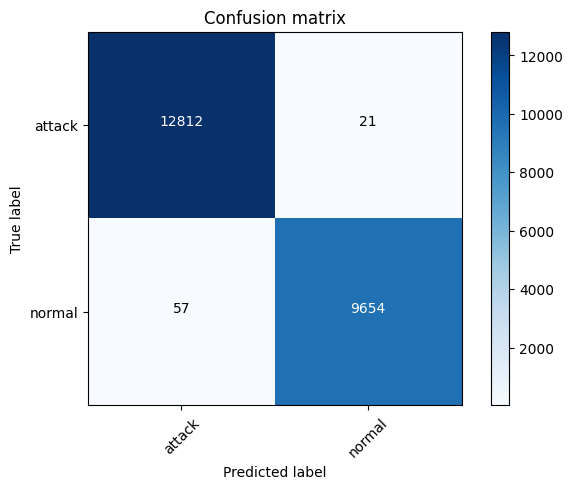

In [153]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_Test, pred_test)
import itertools
classes = ['attack','normal']
plt.figure()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
print(cm)
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j].round(4),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')